In [10]:
#decision tree

# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
dt_model = DecisionTreeClassifier()
# Train the Decision Tree model
dt_model.fit(X_train, y_train)
datay_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier:{accuracy}')

Accuracy of Decision Tree Classifier:1.0


In [5]:
#Write a program to predict the percentage of heart disease (the dependent variable) based
#on two independent variables, percentage of people biking to town and percentage of people
#smoking using Multiple Linear Regression Technique and evaluate its performance. Given a
#data set of 498 items.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Generate synthetic dataset with 498 records
np.random.seed(42)

data = {
    'biking': np.random.uniform(0, 50, 498),      # % biking to work
    'smoking': np.random.uniform(5, 40, 498),     # % smoking
}

# Assume heart disease % decreases with biking and increases with smoking
data['heart_disease'] = (
    20 - 0.3 * data['biking'] + 0.5 * data['smoking'] + np.random.normal(0, 2, 498)
)

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['biking', 'smoking']]
y = df['heart_disease']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output
print("Model Coefficients:")
print(f"Biking coefficient: {model.coef_[0]:.4f}")
print(f"Smoking coefficient: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}\n")

print("Model Performance:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Coefficients:
Biking coefficient: -0.2919
Smoking coefficient: 0.5008
Intercept: 19.9388

Model Performance:
R-squared (R²): 0.9237
Root Mean Squared Error (RMSE): 1.9729


In [7]:
#Write a program to predict medical expenses (the dependent variable) based on the independent
#variables, age, sex, bmi, children, smoker and region using Multiple Linear Regression
#Technique and evaluate its performance. Given a data set of 1338 items.
#data set - insurance.csv


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("insurance.csv")

# Option 1: Drop rows with missing values (can also use imputation instead)
df.dropna(inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output
print("Model Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

print(f"\nIntercept: {model.intercept_:.2f}")
print("\nModel Performance:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Coefficients:
             Feature   Coefficient
0                age     30.116856
1                bmi    374.884622
2           children    559.438151
3            friends    -28.647281
4            enemies     13.816250
5              chips    -62.822445
6              fries     24.657855
7              ramen    -32.413060
8           toportyu    -45.069461
9           sex_male   -116.595312
10        smoker_yes  23690.502963
11  region_northeast  -2413.519073
12  region_northwest  -2898.428797
13  region_southeast  -4378.927379
14  region_southwest  -3356.594303

Intercept: -1129.61

Model Performance:
R-squared (R²): 0.6930
Root Mean Squared Error (RMSE): 7076.33


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0000


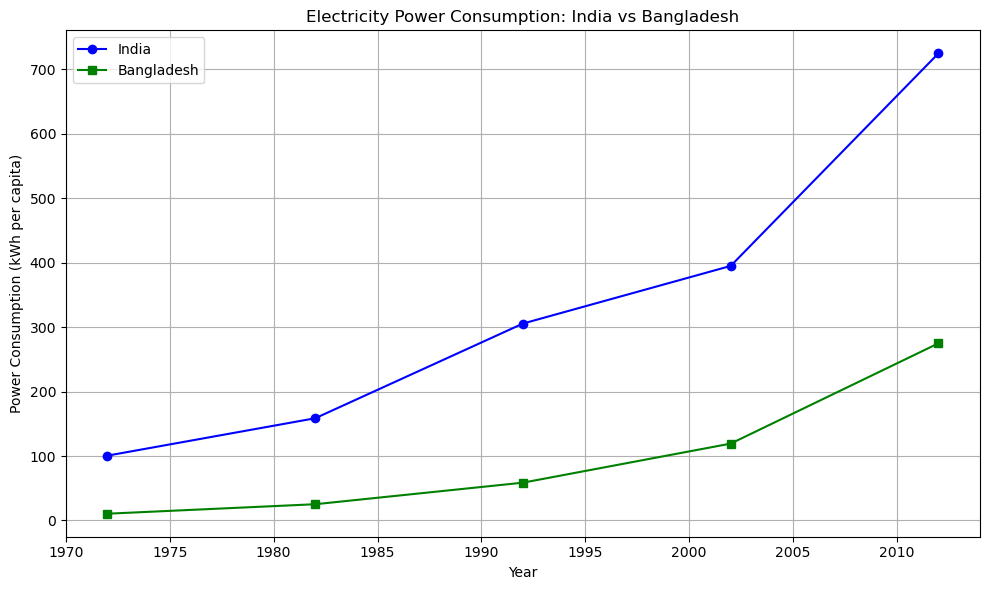

In [22]:
#1- a
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Results
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy:.4f}")

#b

import matplotlib.pyplot as plt

# Given data
year = [1972, 1982, 1992, 2002, 2012]
e_india = [100.6, 158.61, 305.54, 394.96, 724.79]
e_bengladesh = [10.5, 25.21, 58.65, 119.27, 274.87]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year, e_india, marker='o', color='blue', label='India')
plt.plot(year, e_bengladesh, marker='s', color='green', label='Bangladesh')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Power Consumption (kWh per capita)")
plt.title("Electricity Power Consumption: India vs Bangladesh")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Accuracy: 1.0000


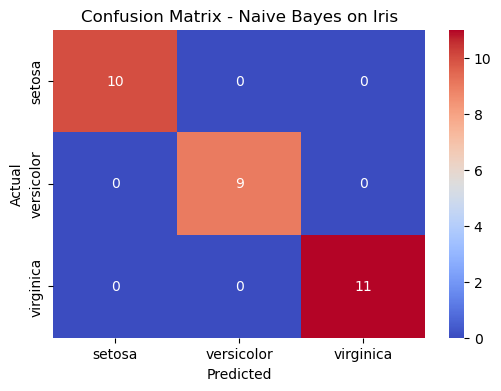

              Name  Age    Address Qualification
0       Jai Nagpur   27     Nagpur           Msc
1     Navin Kanpur   24     Kanpur            MA
2  Mohan Allahabad   28  Allahabad           MCA
3     Anuj Chennai   32    Chennai           PhD


In [15]:
#2- a

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes on Iris')
plt.show()

#b

import pandas as pd

# Define dictionary
employee_data = {
    'Name': ['Jai', 'Navin', 'Mohan', 'Anuj'],
    'Age': [27, 24, 28, 32],
    'Address': ['Nagpur', 'Kanpur', 'Allahabad', 'Chennai'],
    'Qualification': ['Msc', 'MA', 'MCA', 'PhD']
}

# Create DataFrame
df = pd.DataFrame(employee_data)

# Concatenate Address to Name column and overwrite Name
df['Name'] = df['Name'] + ' ' + df['Address']

# Display the dataframe
print(df)


Mean Squared Error (MSE): 2900.19
R-squared (R²): 0.4526


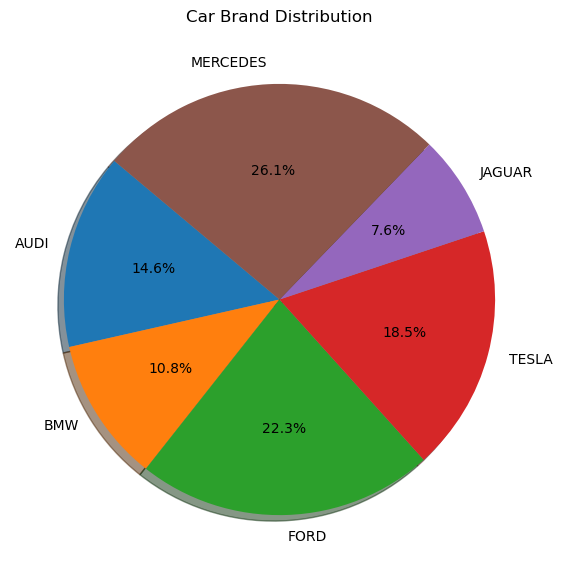

In [19]:
#3- a
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

#b

import matplotlib.pyplot as plt

cars = ['AUDI', 'BMW', 'FORD', 'TESLA', 'JAGUAR', 'MERCEDES']
data = [23, 17, 35, 29, 12, 41]

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(data, labels=cars, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Car Brand Distribution")
plt.show()


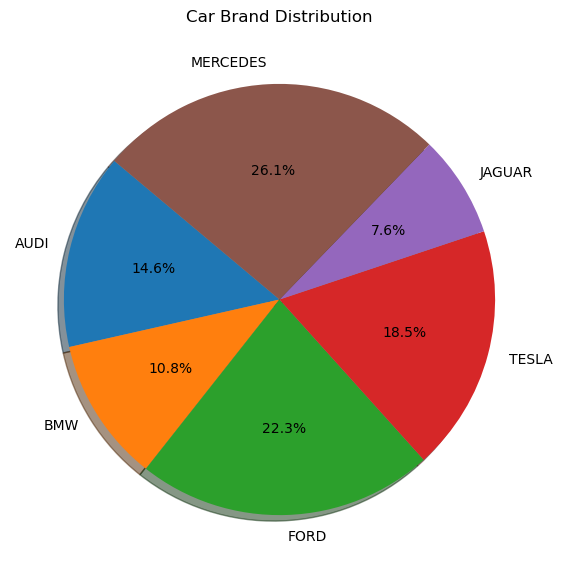

In [26]:
#3 - b

import matplotlib.pyplot as plt

cars = ['AUDI', 'BMW', 'FORD', 'TESLA', 'JAGUAR', 'MERCEDES']
data = [23, 17, 35, 29, 12, 41]

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(data, labels=cars, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Car Brand Distribution")
plt.show()


In [25]:
# 4 - a

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on test set
y_pred = dtree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Sample instance to predict
sample_instance = [[5.1, 3.5, 1.4, 0.2]]  # Sepal Length, Sepal Width, Petal Length, Petal Width
predicted_class = dtree.predict(sample_instance)
print(f"Predicted class for sample instance: {iris.target_names[predicted_class][0]}")



Decision Tree Accuracy: 1.0000
Predicted class for sample instance: setosa


In [23]:
#4 - b

import numpy as np

# Define an array
arr = np.array([5, 10, 15, 20, 25])

print("Original array:", arr)

# Add 1 to each element
arr_plus_one = arr + 1
print("After adding 1:", arr_plus_one)

# Subtract 2 from each element
arr_minus_two = arr - 2
print("After subtracting 2:", arr_minus_two)

# Sum of all elements
total_sum = arr.sum()
print("Sum of all elements:", total_sum)


Original array: [ 5 10 15 20 25]
After adding 1: [ 6 11 16 21 26]
After subtracting 2: [ 3  8 13 18 23]
Sum of all elements: 75
